In [2]:
# importer le notebook des fonctions utiles et des importations nécessaires

import nbimporter
from functions_and_imports import *

# Chargement des données

In [3]:
data_file = 'Dataset.csv'
data = pd.read_csv(data_file)
data.drop(columns=['Unnamed: 0', 'Unit1', 'Unit2'], inplace=True)
data.head()

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,68.54,0,-0.02,1,0,17072
1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,NaN,...,NaN,NaN,NaN,NaN,68.54,0,-0.02,2,0,17072
2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,68.54,0,-0.02,3,0,17072
3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,NaN,...,NaN,NaN,NaN,NaN,68.54,0,-0.02,4,0,17072
4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,NaN,...,30.6,11.3,NaN,330.0,68.54,0,-0.02,5,0,17072


# Analyse Exploratoire des Données (EDA)

In [4]:
data.shape

(1552210, 41)

In [5]:
data.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'HospAdmTime', 'ICULOS',
       'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [6]:
# Types de données de chaque colonne
data.dtypes

Hour                  int64
HR                  float64
O2Sat               float64
Temp                float64
SBP                 float64
MAP                 float64
DBP                 float64
Resp                float64
EtCO2               float64
BaseExcess          float64
HCO3                float64
FiO2                float64
pH                  float64
PaCO2               float64
SaO2                float64
AST                 float64
BUN                 float64
Alkalinephos        float64
Calcium             float64
Chloride            float64
Creatinine          float64
Bilirubin_direct    float64
Glucose             float64
Lactate             float64
Magnesium           float64
Phosphate           float64
Potassium           float64
Bilirubin_total     float64
TroponinI           float64
Hct                 float64
Hgb                 float64
PTT                 float64
WBC                 float64
Fibrinogen          float64
Platelets           float64
Age                 

In [7]:
# Nombre d'obserations pour chaque patients
data['Patient_ID'].value_counts()

Patient_ID
3658      336
114471    336
101922    336
117406    336
4905      336
         ... 
110085      8
16854       8
118844      8
16161       8
109559      8
Name: count, Length: 40336, dtype: int64

In [8]:
# Statistiques
data.describe()

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
count,1.552210e+06,1.398811e+06,1.349474e+06,525226.000000,1.325945e+06,1.358940e+06,1.065656e+06,1.313875e+06,57636.000000,84145.000000,...,45699.000000,99447.000000,10242.000000,92209.000000,1.552210e+06,1.552210e+06,1.552202e+06,1.552210e+06,1.552210e+06,1.552210e+06
mean,2.549274e+01,8.458144e+01,9.719395e+01,36.977228,1.237505e+02,8.240010e+01,6.383056e+01,1.872650e+01,32.957657,-0.689919,...,41.231193,11.446405,287.385706,196.013911,6.200947e+01,5.592690e-01,-5.612512e+01,2.699499e+01,1.798468e-02,5.920148e+04
std,2.888256e+01,1.732524e+01,2.936924e+00,0.770014,2.323156e+01,1.634175e+01,1.395601e+01,5.098194e+00,7.951662,4.294297,...,26.217669,7.731013,153.002908,103.635366,1.638622e+01,4.964749e-01,1.622569e+02,2.900542e+01,1.328956e-01,5.024819e+04
min,0.000000e+00,2.000000e+01,2.000000e+01,20.900000,2.000000e+01,2.000000e+01,2.000000e+01,1.000000e+00,10.000000,-32.000000,...,12.500000,0.100000,34.000000,1.000000,1.400000e+01,0.000000e+00,-5.366860e+03,1.000000e+00,0.000000e+00,1.000000e+00
25%,9.000000e+00,7.200000e+01,9.600000e+01,36.500000,1.070000e+02,7.100000e+01,5.400000e+01,1.500000e+01,28.000000,-3.000000,...,27.800000,7.600000,184.000000,126.000000,5.168000e+01,0.000000e+00,-4.705000e+01,1.100000e+01,0.000000e+00,9.990000e+03
50%,1.900000e+01,8.350000e+01,9.800000e+01,37.000000,1.210000e+02,8.000000e+01,6.200000e+01,1.800000e+01,33.000000,0.000000,...,32.400000,10.300000,250.000000,181.000000,6.400000e+01,1.000000e+00,-6.030000e+00,2.100000e+01,0.000000e+00,1.996500e+04
75%,3.300000e+01,9.550000e+01,9.950000e+01,37.500000,1.380000e+02,9.200000e+01,7.200000e+01,2.150000e+01,38.000000,1.000000,...,42.800000,13.800000,349.000000,244.000000,7.400000e+01,1.000000e+00,-4.000000e-02,3.400000e+01,0.000000e+00,1.098780e+05
max,3.350000e+02,2.800000e+02,1.000000e+02,50.000000,3.000000e+02,3.000000e+02,3.000000e+02,1.000000e+02,100.000000,100.000000,...,250.000000,440.000000,1760.000000,2322.000000,1.000000e+02,1.000000e+00,2.399000e+01,3.360000e+02,1.000000e+00,1.200000e+05


In [9]:
# Résumé
display_basic_info(data)

Shape of the DataFrame: (1552210, 41)

Number of unique patients: 40336

SepsisLabel class counts:
 SepsisLabel
0    1524294
1      27916
Name: count, dtype: int64

Columns in the DataFrame:
 Index(['Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'HospAdmTime', 'ICULOS',
       'SepsisLabel', 'Patient_ID'],
      dtype='object')

Data Types:
 Hour                  int64
HR                  float64
O2Sat               float64
Temp                float64
SBP                 float64
MAP                 float64
DBP                 float64
Resp                float64
EtCO2               float64
BaseExcess          float64
HCO3          

# Visualisation

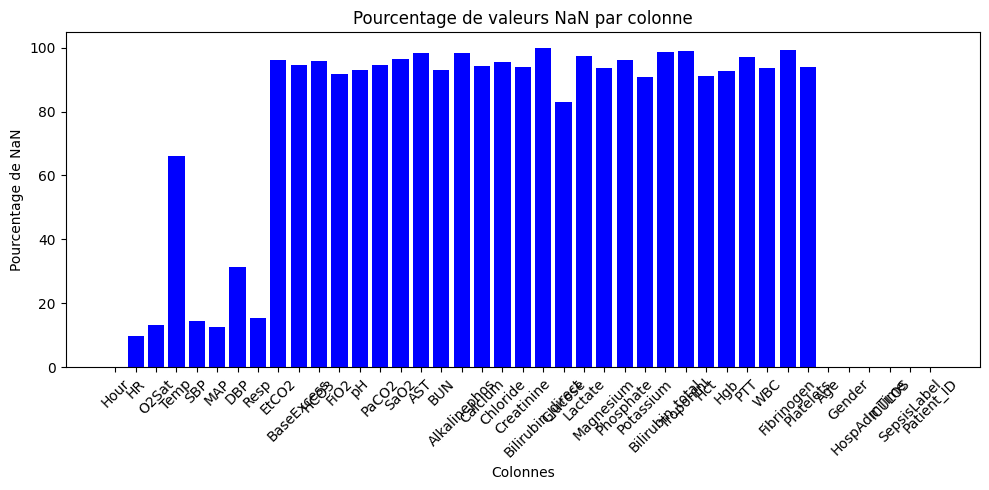

In [10]:
# Calculer le pourcentage de valeurs NaN pour chaque colonne
nan_percentage = data.isnull().mean() * 100

# Créer le diagramme en barres
plt.figure(figsize=(10, 5))  # Définir la taille du graphique
plt.bar(nan_percentage.index, nan_percentage, color='blue')  # Dessiner les barres
plt.xlabel('Colonnes')  # Nommer l'axe des x
plt.ylabel('Pourcentage de NaN')  # Nommer l'axe des y
plt.title('Pourcentage de valeurs NaN par colonne')  # Titre du graphique
plt.xticks(rotation=45)  # Faire pivoter les étiquettes des x pour une meilleure lisibilité
plt.tight_layout()  # Ajuster automatiquement les paramètres du subplot
plt.show()  # Afficher le graphique

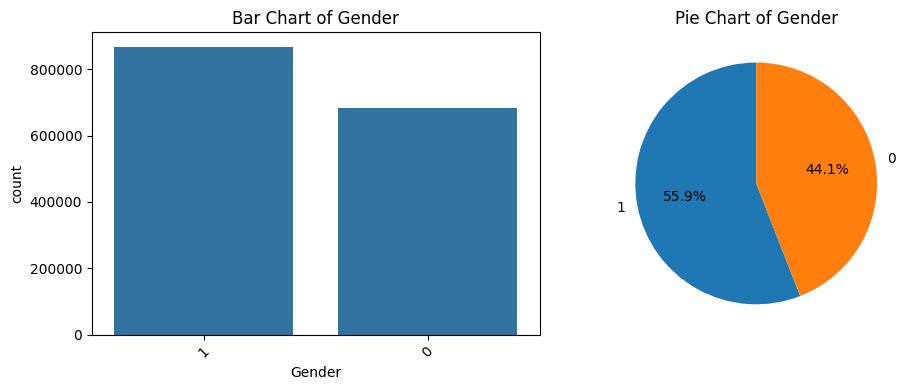

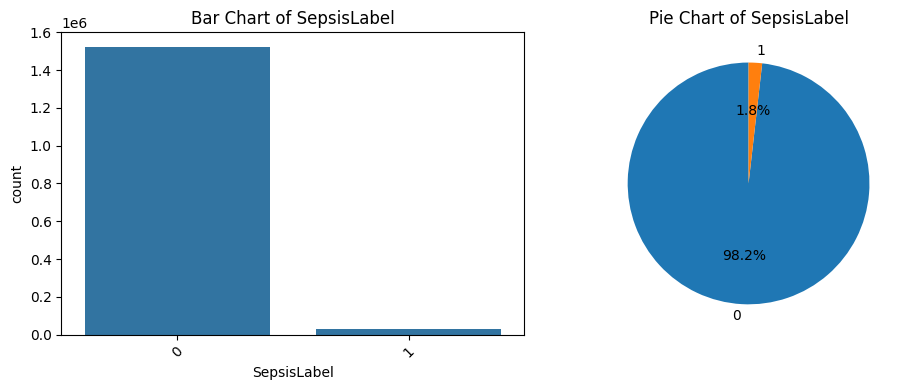

In [11]:
# Diagrammes en barres et en cercle pour les variables catégoriques
cat_features = data.select_dtypes(include=['object']).columns.tolist() + ['Gender', 'SepsisLabel']
for column in cat_features:
    # Calculer le nombre de chaque catégorie
    counts = data[column].value_counts()

    # Créer une figure avec deux subplots
    plt.figure(figsize=(10, 4))

    # Premier subplot pour le diagramme en barres
    plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, position 1
    sns.countplot(x=column, data=data, order=counts.index)  # Utiliser order pour garder l'ordre du pie chart
    plt.title(f'Bar Chart of {column}')
    plt.xticks(rotation=45)

    # Deuxième subplot pour le diagramme en cercle
    plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, position 2
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {column}')

    # Afficher la figure
    plt.tight_layout()
    plt.show()

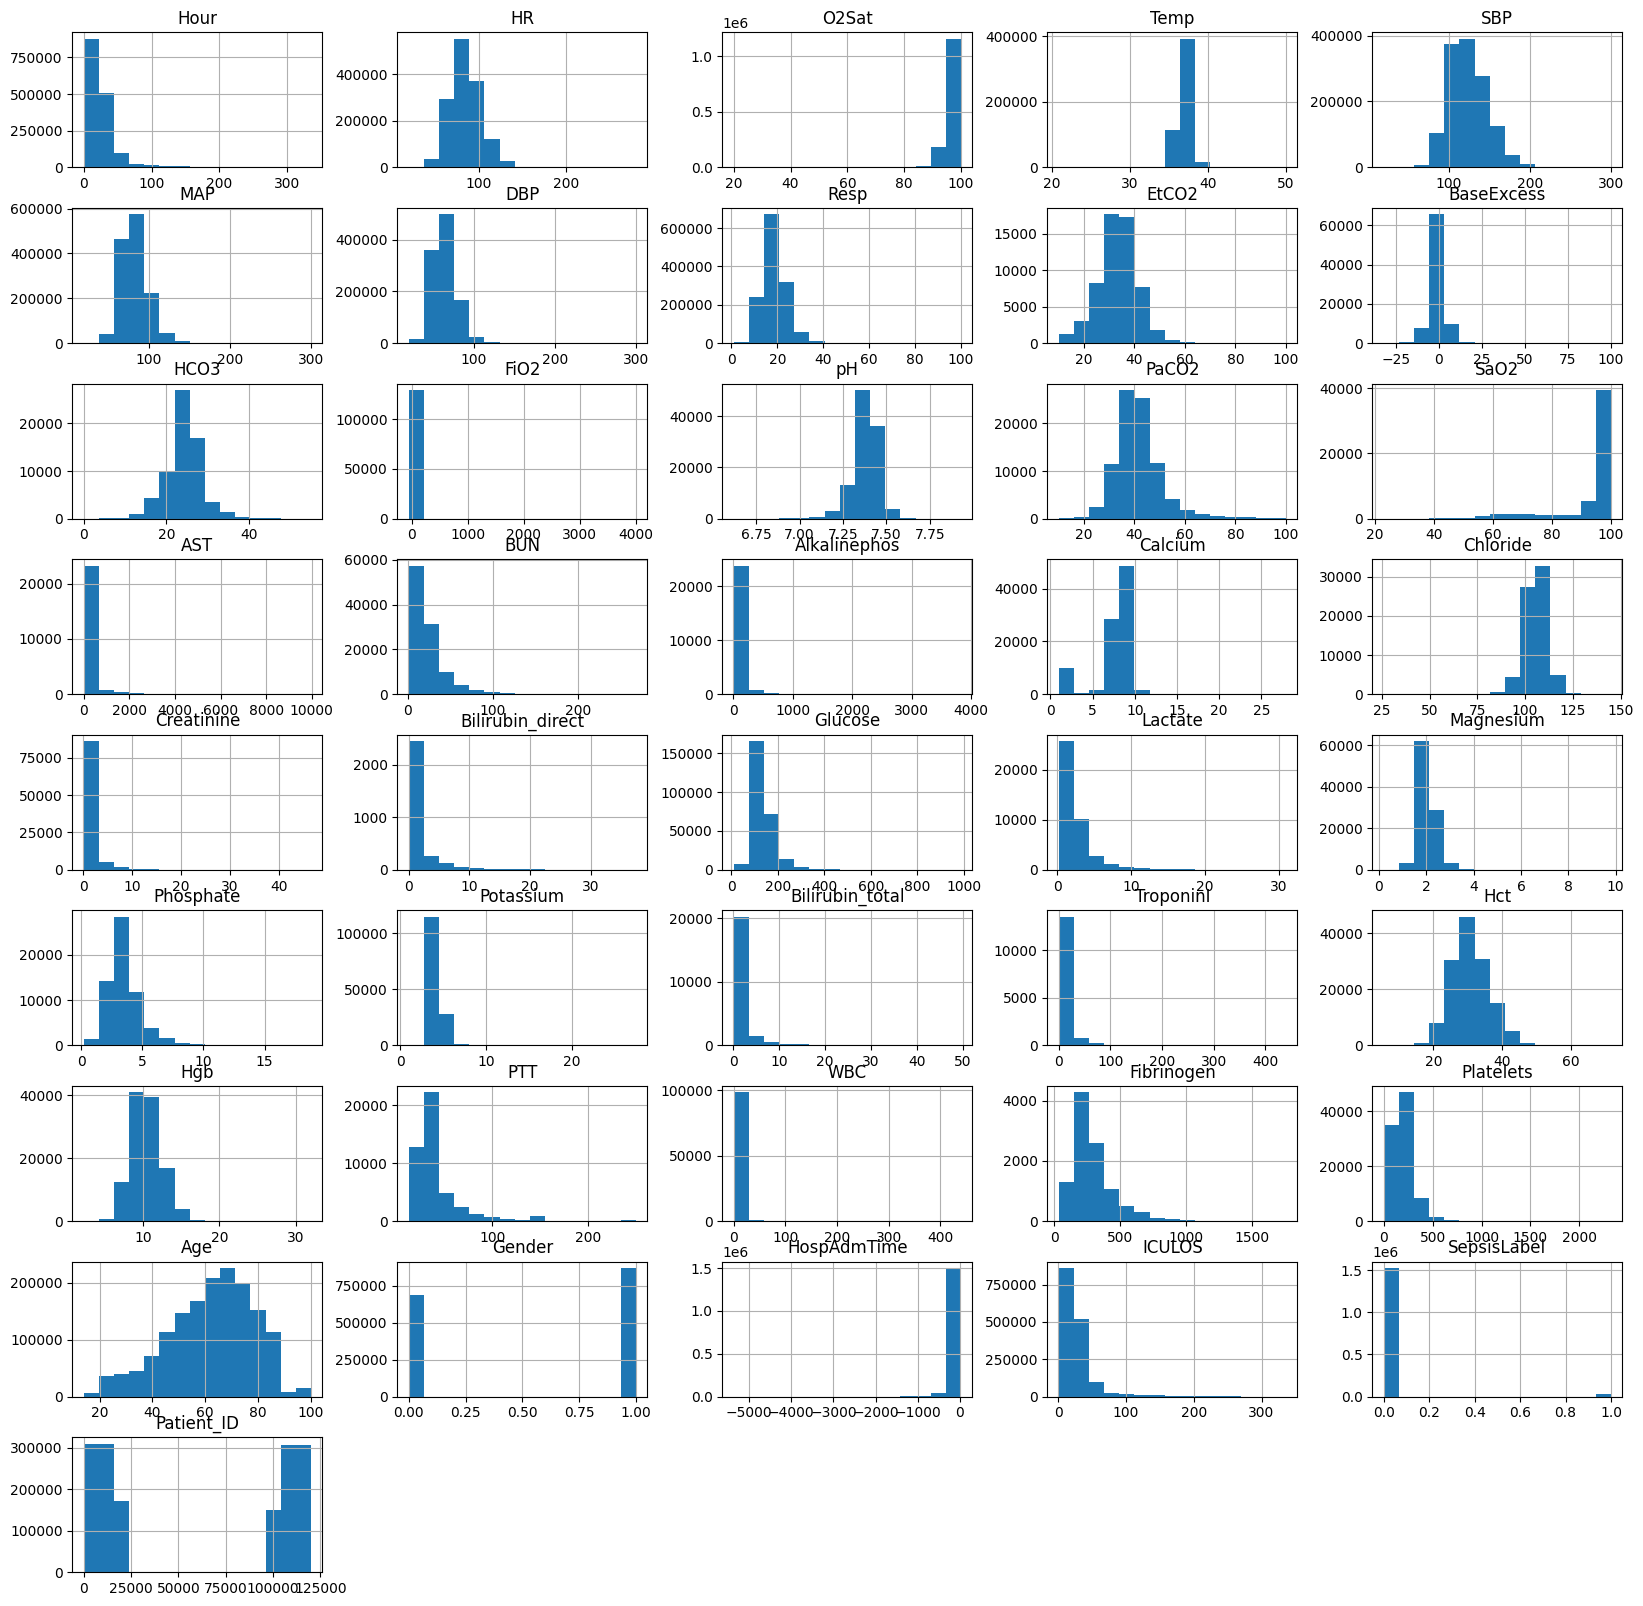

In [12]:
# Histogrammes pour les variables numériques
num_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
data[num_features].hist(bins=15, figsize=(20, 20), layout=(9, 5))
plt.show()


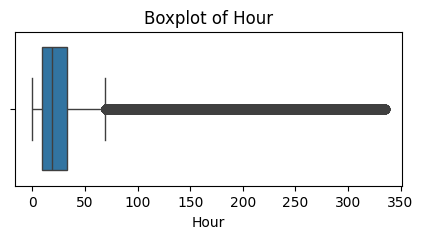

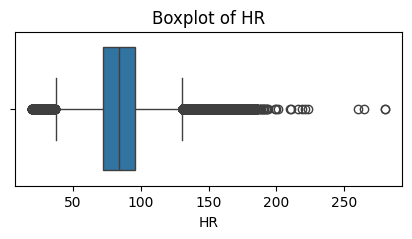

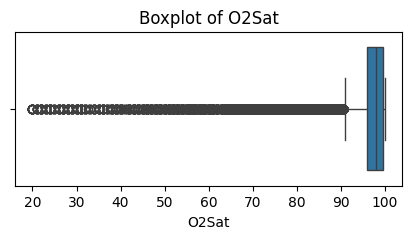

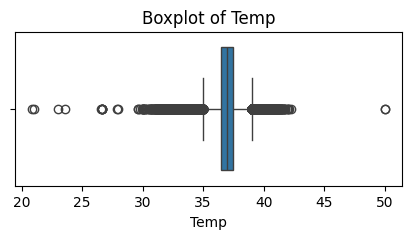

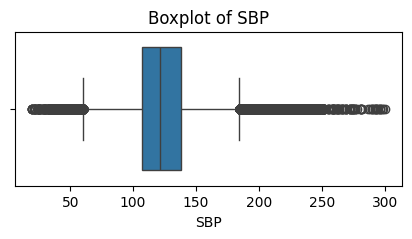

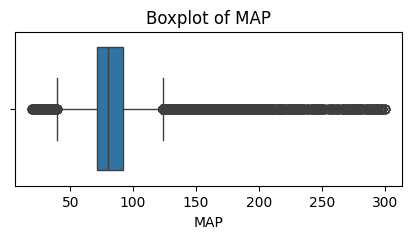

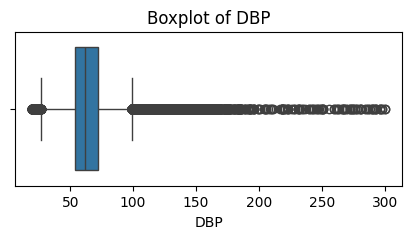

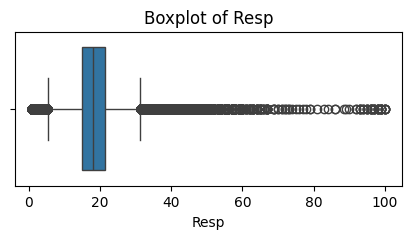

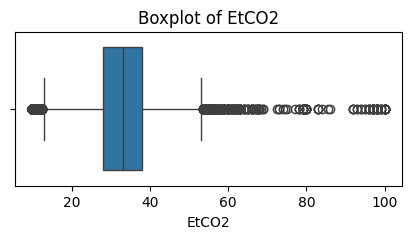

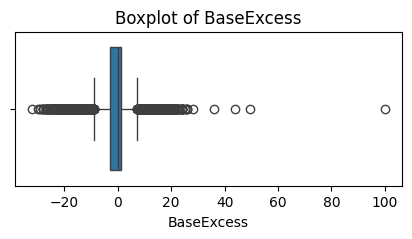

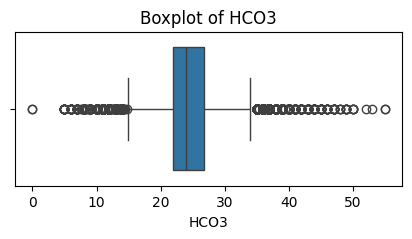

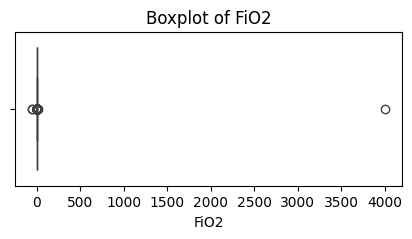

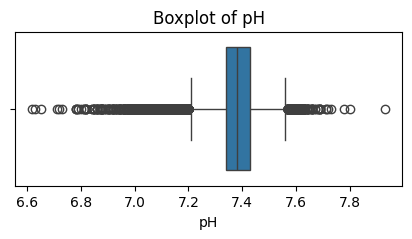

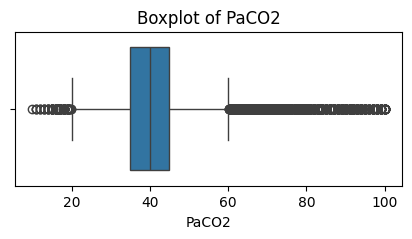

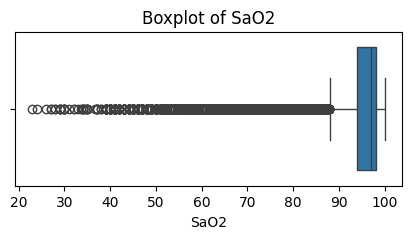

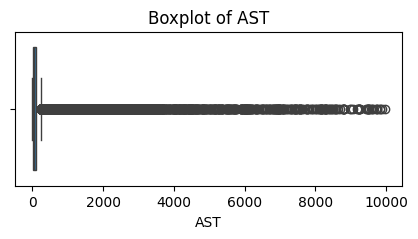

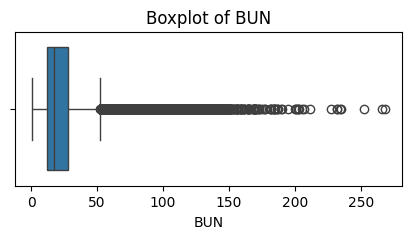

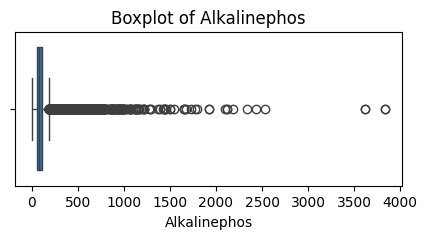

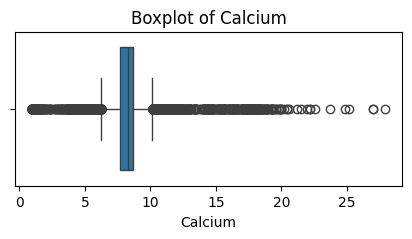

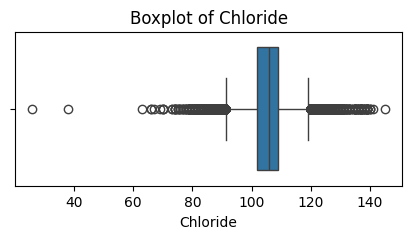

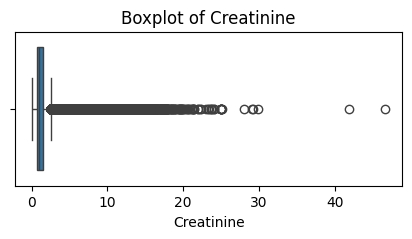

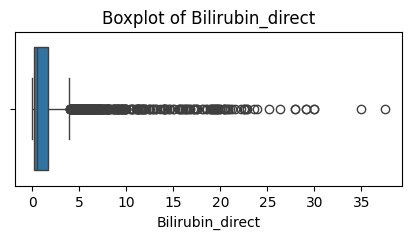

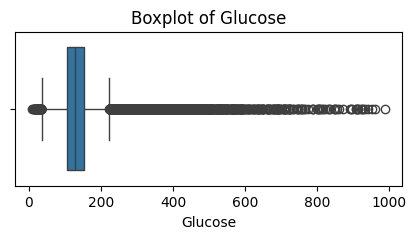

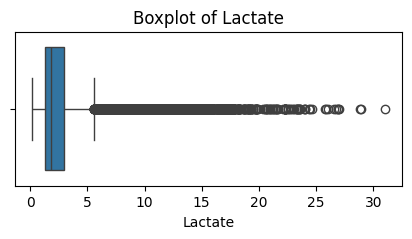

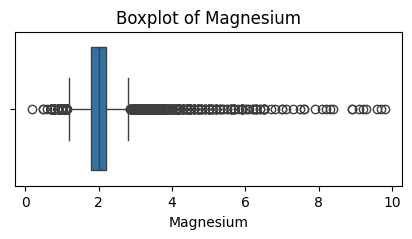

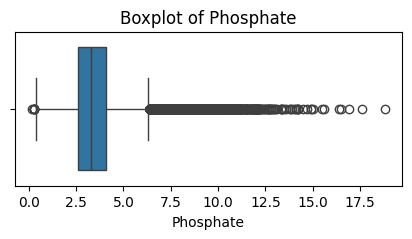

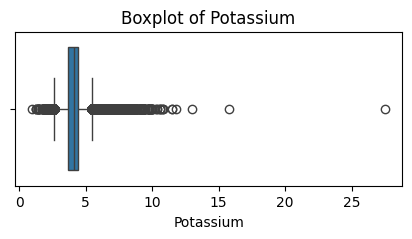

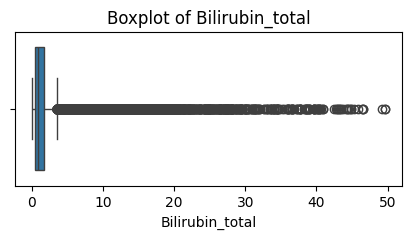

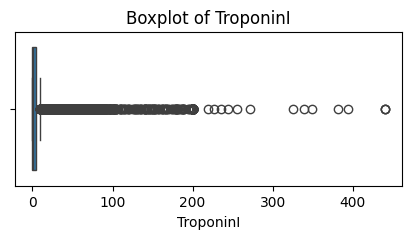

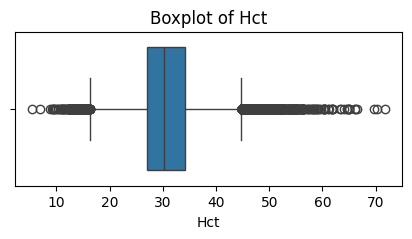

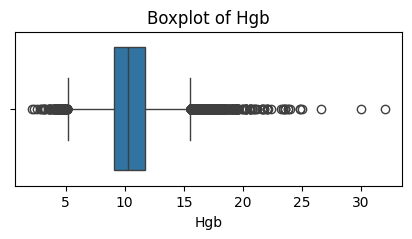

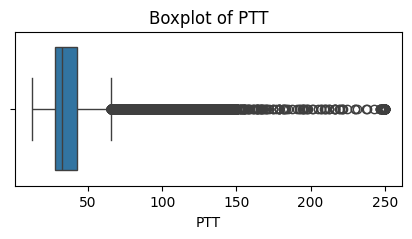

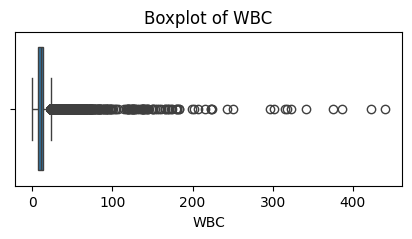

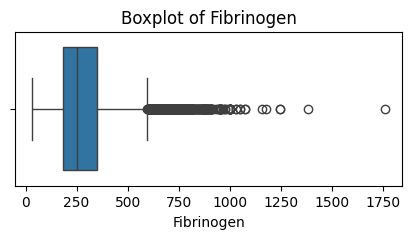

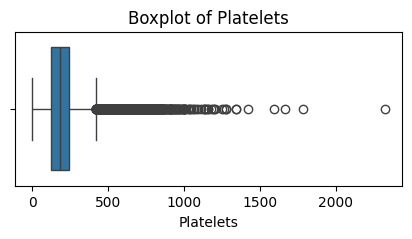

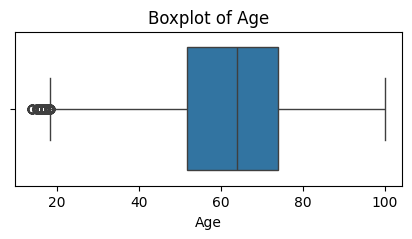

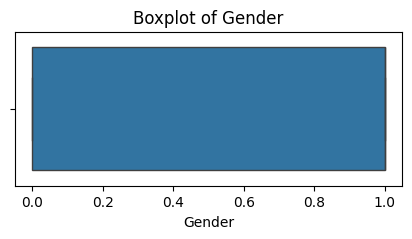

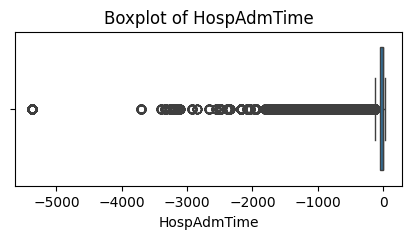

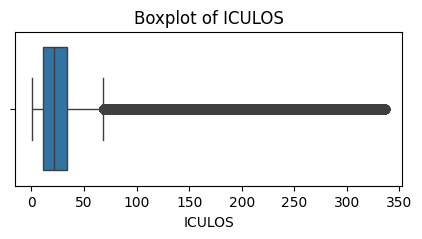

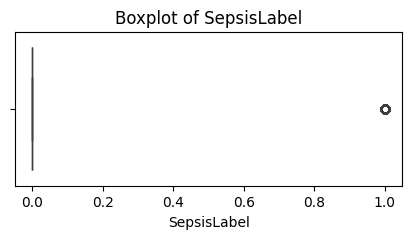

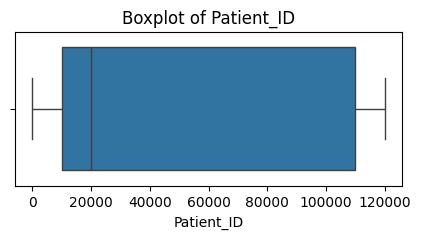

In [13]:
# Diagrammes en boîte pour visualiser les distributions et identifier les outliers
for column in num_features:
    plt.figure(figsize=(5, 2))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


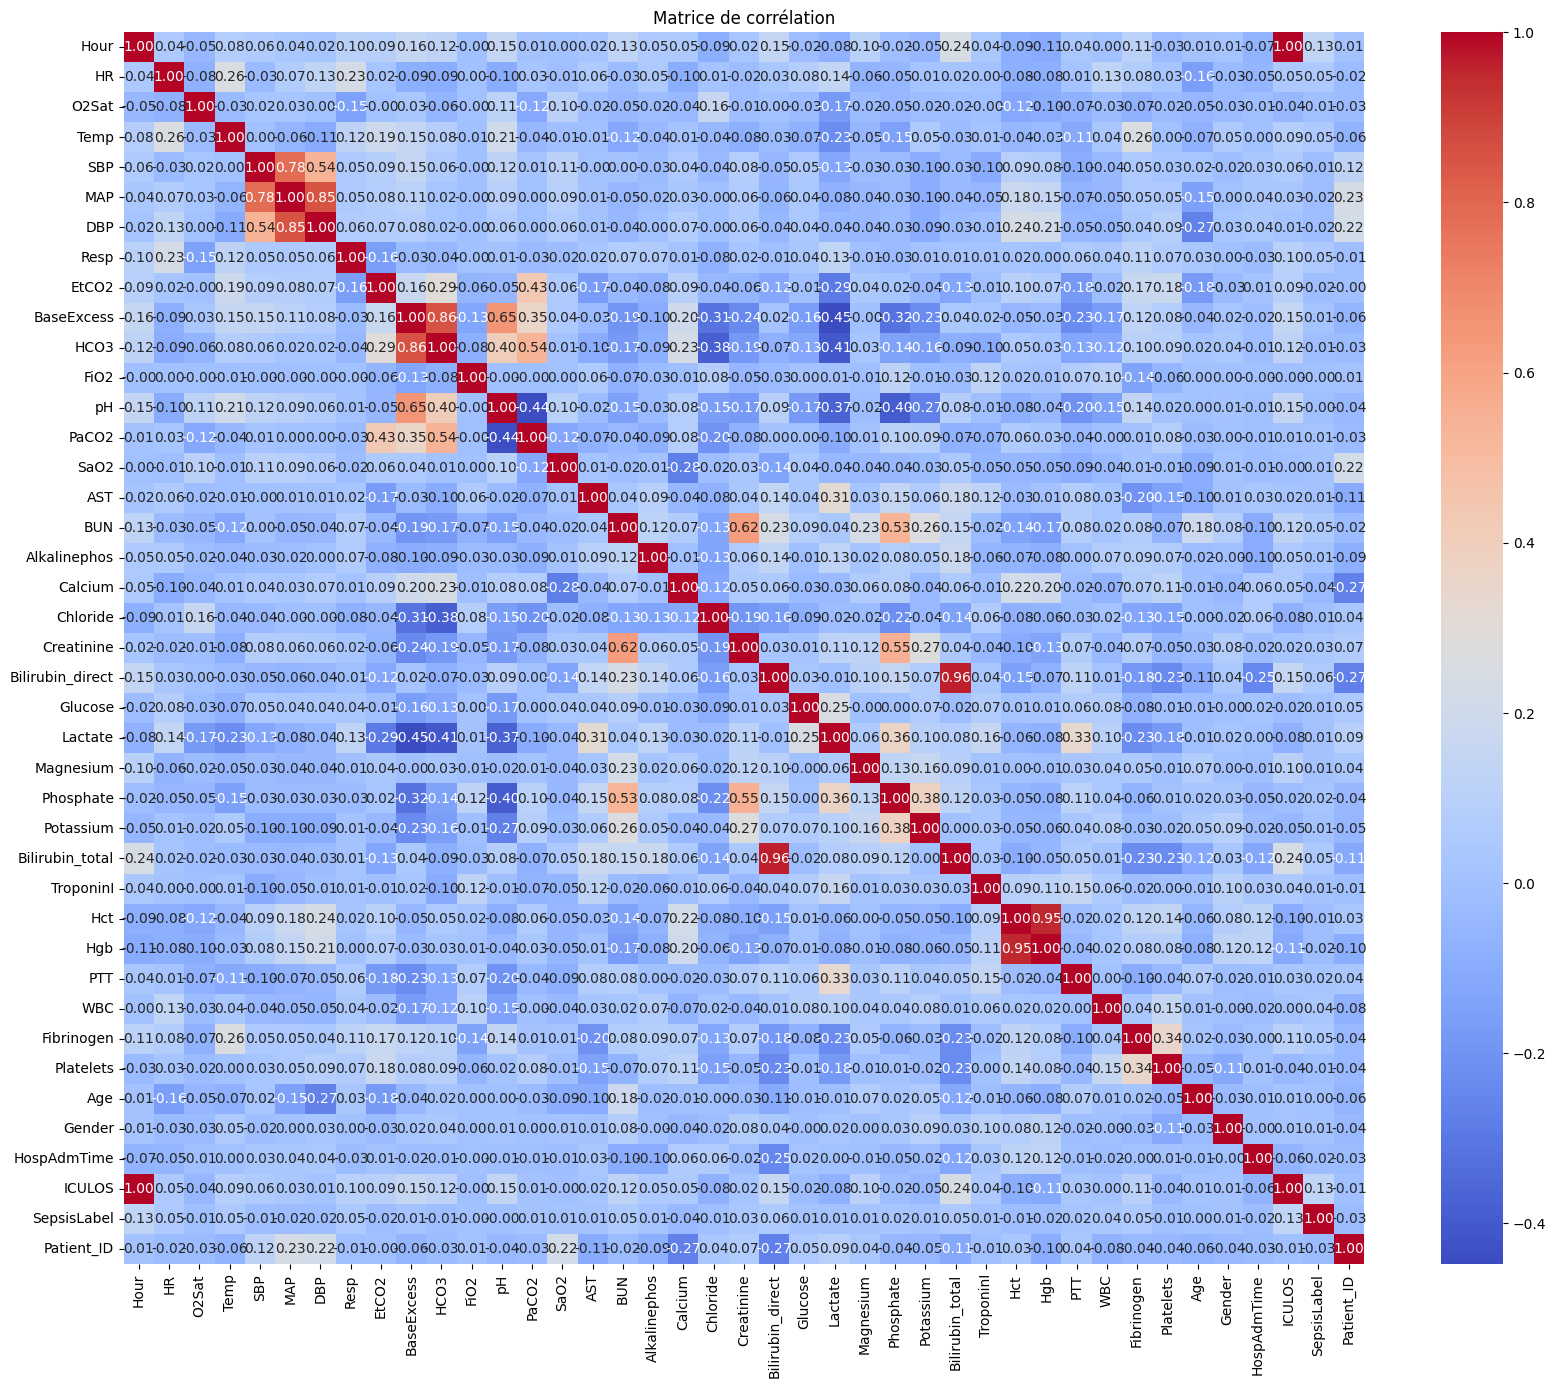

In [14]:
# Matrice de corrélation
plt.figure(figsize=(20, 16))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()


In [15]:
# Tri des données par patient et heure
data.sort_values(by=['Patient_ID', 'Hour'], inplace=True)

In [16]:
display(data.iloc[600 : 615, :])

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
32848,15,86.0,100.0,NaN,148.0,95.0,67.0,18.0,NaN,NaN,...,NaN,NaN,NaN,NaN,65.79,1,-0.02,17,0,11
32849,16,87.0,100.0,NaN,164.0,102.5,72.0,17.5,NaN,NaN,...,NaN,NaN,NaN,NaN,65.79,1,-0.02,18,0,11
32850,17,89.0,100.0,NaN,122.0,78.0,56.0,19.0,NaN,NaN,...,NaN,NaN,NaN,NaN,65.79,1,-0.02,19,0,11
32851,18,94.0,100.0,37.83,142.0,87.0,61.0,18.0,NaN,NaN,...,NaN,NaN,NaN,NaN,65.79,1,-0.02,20,0,11
32852,19,93.0,100.0,NaN,146.0,89.0,63.0,17.0,NaN,NaN,...,NaN,NaN,NaN,NaN,65.79,1,-0.02,21,0,11
32853,20,101.0,100.0,NaN,146.0,91.0,63.0,21.0,NaN,1.0,...,NaN,NaN,NaN,NaN,65.79,1,-0.02,22,0,11
32854,21,99.0,100.0,NaN,146.0,85.0,57.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,65.79,1,-0.02,23,0,11
32855,22,97.0,100.0,37.56,144.0,85.0,59.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,65.79,1,-0.02,24,0,11
32856,23,100.0,100.0,NaN,142.0,85.0,59.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,65.79,1,-0.02,25,0,11
32857,24,98.0,100.0,NaN,147.0,86.0,59.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,65.79,1,-0.02,26,1,11


In [17]:
# Sous df composé des patients atteints de sepsis au cours de leur séjour
sepsis_patients = data['Patient_ID'][data['SepsisLabel'] == 1]
df_sepsis_patients = data[data['Patient_ID'].isin(sepsis_patients)]
df_sepsis_patients

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
470243,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,27.92,1,-0.03,1,0,9
470244,1,117.0,99.0,NaN,116.0,97.0,81.0,20.0,NaN,NaN,...,NaN,NaN,NaN,NaN,27.92,1,-0.03,2,0,9
470245,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.0,...,46.4,8.9,124.0,64.0,27.92,1,-0.03,3,0,9
470246,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,...,40.8,3.9,180.0,114.0,27.92,1,-0.03,4,0,9
470247,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,...,NaN,NaN,NaN,NaN,27.92,1,-0.03,5,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296063,36,91.0,96.0,37.0,127.0,94.0,75.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,56.00,0,-321.03,37,1,119959
1296064,37,91.0,95.0,36.7,151.0,103.0,74.0,24.0,NaN,NaN,...,NaN,NaN,NaN,NaN,56.00,0,-321.03,38,1,119959
1296065,38,95.0,94.0,36.6,150.0,104.0,74.0,23.0,NaN,NaN,...,NaN,NaN,NaN,NaN,56.00,0,-321.03,39,1,119959
1296066,39,91.0,95.0,36.7,131.0,92.0,72.0,21.0,NaN,NaN,...,NaN,NaN,NaN,NaN,56.00,0,-321.03,40,1,119959


In [18]:
# # Sous df composé des patients non atteints de sepsis au cours de leur séjour
df_non_sepsis_patients = data[~data['Patient_ID'].isin(sepsis_patients)]
df_non_sepsis_patients

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
132940,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,83.14,0,-0.03,1,0,1
132941,1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,...,NaN,NaN,NaN,NaN,83.14,0,-0.03,2,0,1
132942,2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,...,NaN,NaN,NaN,NaN,83.14,0,-0.03,3,0,1
132943,3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,...,NaN,NaN,NaN,NaN,83.14,0,-0.03,4,0,1
132944,4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,...,NaN,NaN,NaN,NaN,83.14,0,-0.03,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471604,30,80.0,96.0,NaN,115.0,87.00,65.0,15.0,NaN,NaN,...,NaN,NaN,NaN,NaN,62.00,0,0.00,31,0,120000
1471605,31,74.0,97.0,NaN,114.0,83.00,67.0,15.0,NaN,NaN,...,NaN,NaN,NaN,NaN,62.00,0,0.00,32,0,120000
1471606,32,78.0,98.0,NaN,110.0,83.00,69.0,15.0,NaN,NaN,...,NaN,NaN,NaN,NaN,62.00,0,0.00,33,0,120000
1471607,33,82.0,99.0,36.6,124.0,91.00,71.0,16.0,NaN,NaN,...,NaN,NaN,NaN,NaN,62.00,0,0.00,34,0,120000


# Filtrer les données

In [19]:
from functions_and_imports import aggregate_sepsis_label

In [20]:
explore_df = aggregate_sepsis_label(data)

In [21]:
# Récupérer 12 points de données pour chaque patient
df_12h = get_nbr_rows_per_patient_v2(explore_df, 12)

In [22]:
# Vérifier les patients n'ayant pas le nombre de points de données suffisant
all_have_six = check_nbr_rows_per_patient(df_12h, 12)
print(all_have_six)

Certains patients n'ont pas exactement 6 lignes.
Patient_ID
15        11
27        10
34         9
56         6
58         6
          ..
119854     6
119872     6
119888     8
119932     9
119947     9
Length: 1245, dtype: int64
False


In [23]:
# Supprimer les patients ne respectant pas le critère précédent
df_12h_filtered = remove_patients_without_nbr_rows(df_12h, 12)

In [24]:
df_12h_filtered.drop(columns=['ICULOS', 'Bilirubin_total', 'Hgb'], inplace=True)

/var/folders/8l/kmhsmtn92m9fc5l6fgryz4hm0000gn/T/ipykernel_57571/845495454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_12h_filtered.drop(columns=['ICULOS', 'Bilirubin_total', 'Hgb'], inplace=True)


In [25]:
balanced_df = balance_classes_by_nan(df_12h_filtered)

In [26]:
balanced_df

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,SepsisLabel,Patient_ID,will_have_sepsis
546,242,135.0,97.0,38.67,136.0,101.0,82.0,31.0,NaN,NaN,...,NaN,NaN,NaN,NaN,27.92,1,-0.03,0,9,1
547,243,129.0,98.0,NaN,139.0,105.0,85.0,29.0,NaN,NaN,...,NaN,NaN,NaN,NaN,27.92,1,-0.03,0,9,1
548,244,122.0,99.0,38.06,136.0,105.0,86.0,28.0,NaN,NaN,...,NaN,NaN,NaN,NaN,27.92,1,-0.03,0,9,1
549,245,121.0,98.0,NaN,140.0,109.0,89.0,28.0,NaN,NaN,...,NaN,14.4,NaN,759.0,27.92,1,-0.03,0,9,1
550,246,115.0,98.0,37.72,139.0,105.0,85.0,27.0,NaN,0.0,...,NaN,NaN,NaN,NaN,27.92,1,-0.03,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551956,7,75.0,100.0,37.30,124.0,80.0,60.0,15.0,27.0,NaN,...,NaN,NaN,NaN,NaN,71.00,1,-29.57,0,119994,0
1551957,8,73.0,100.0,37.25,122.0,80.0,60.0,14.0,27.0,NaN,...,NaN,NaN,NaN,NaN,71.00,1,-29.57,0,119994,0
1551958,9,73.0,100.0,37.40,120.0,78.0,58.0,14.5,26.0,NaN,...,NaN,7.2,NaN,71.0,71.00,1,-29.57,0,119994,0
1551959,10,78.0,96.0,37.70,110.0,70.0,54.0,18.0,42.0,NaN,...,NaN,NaN,NaN,NaN,71.00,1,-29.57,0,119994,0


# Imputation

In [27]:
# imputation par KNN
from sklearn.impute import KNNImputer

# Imputation avec KNN
imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(imputer.fit_transform(balanced_df), columns=balanced_df.columns)

In [28]:
# Sauvegarde après imputation
df_knn_imputed.to_csv('../data/df_12H_imputed_with_knn.csv', index=False)

In [29]:
display_basic_info(df_knn_imputed)

Shape of the DataFrame: (52536, 39)

Number of unique patients: 4378

SepsisLabel class counts:
 SepsisLabel
0.0    39402
1.0    13134
Name: count, dtype: int64

Number of unique patients per class in 'will_have_sepsis':
 will_have_sepsis
0.0    2189
1.0    2189
Name: Patient_ID, dtype: int64

Columns in the DataFrame:
 Index(['Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'TroponinI', 'Hct', 'PTT', 'WBC', 'Fibrinogen', 'Platelets', 'Age',
       'Gender', 'HospAdmTime', 'SepsisLabel', 'Patient_ID',
       'will_have_sepsis'],
      dtype='object')

Data Types:
 Hour                float64
HR                  float64
O2Sat               float64
Temp                float64
SBP                 float64
MAP                 float64
DBP         

# Visua

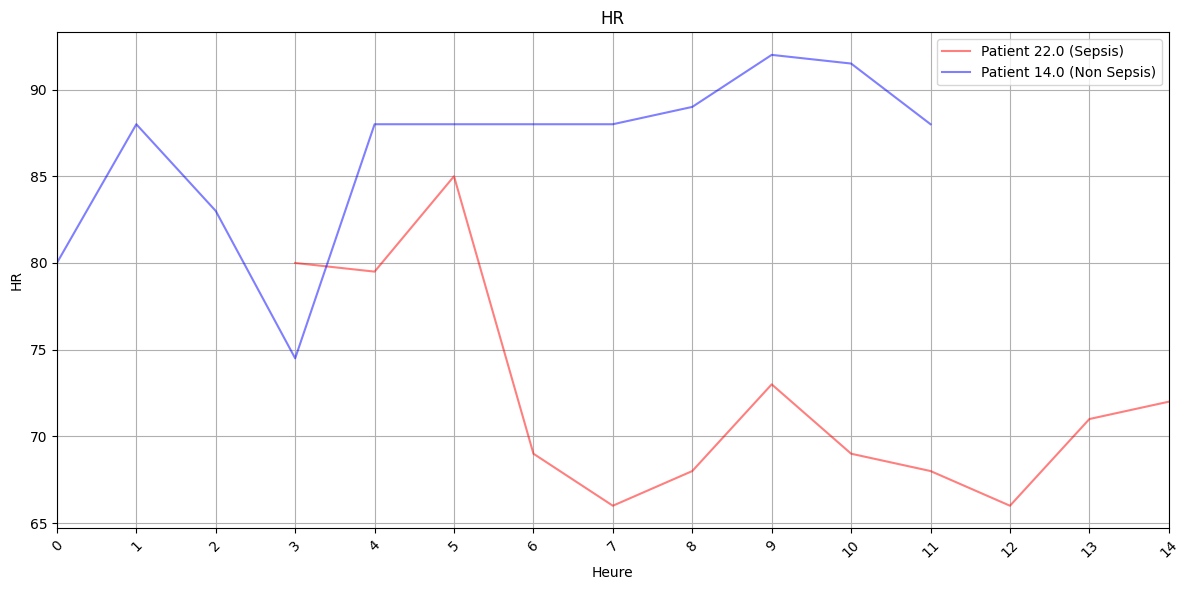

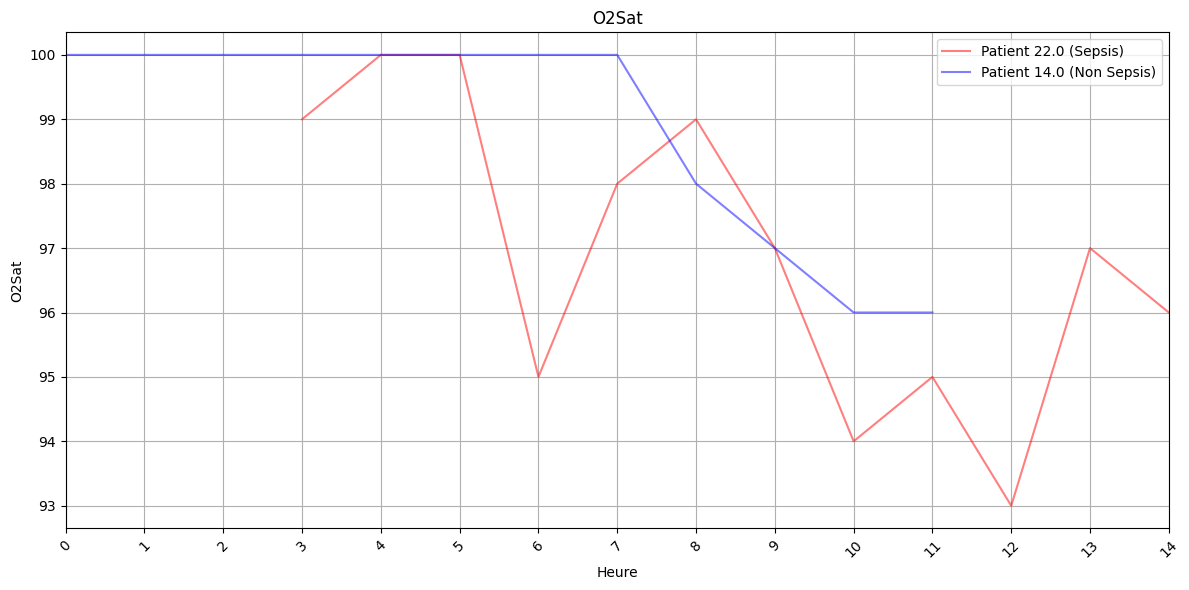

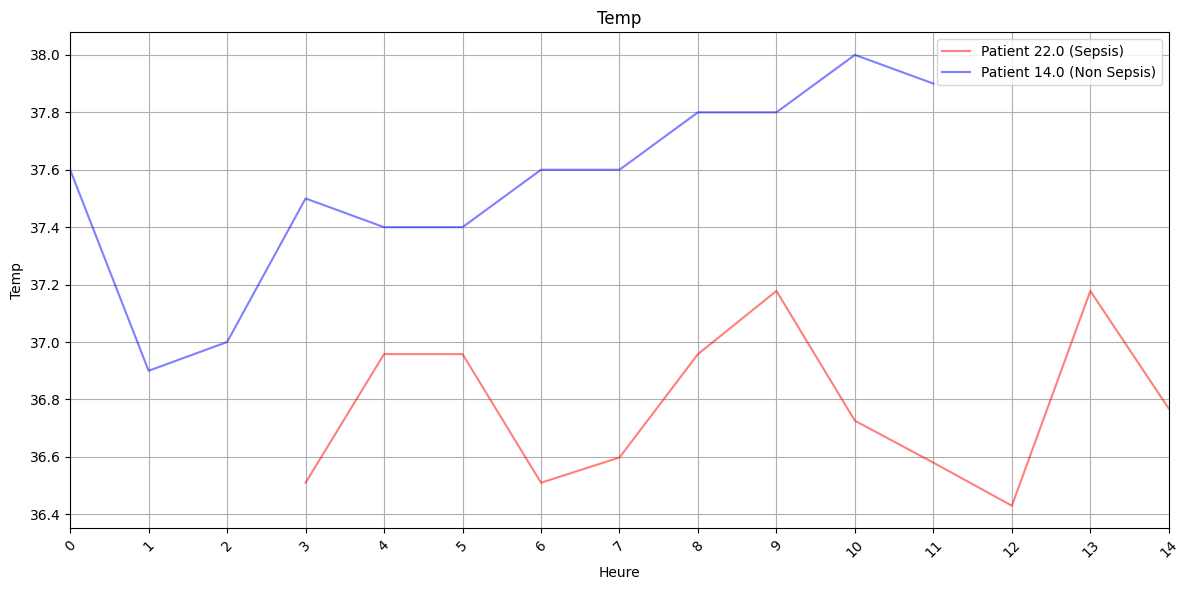

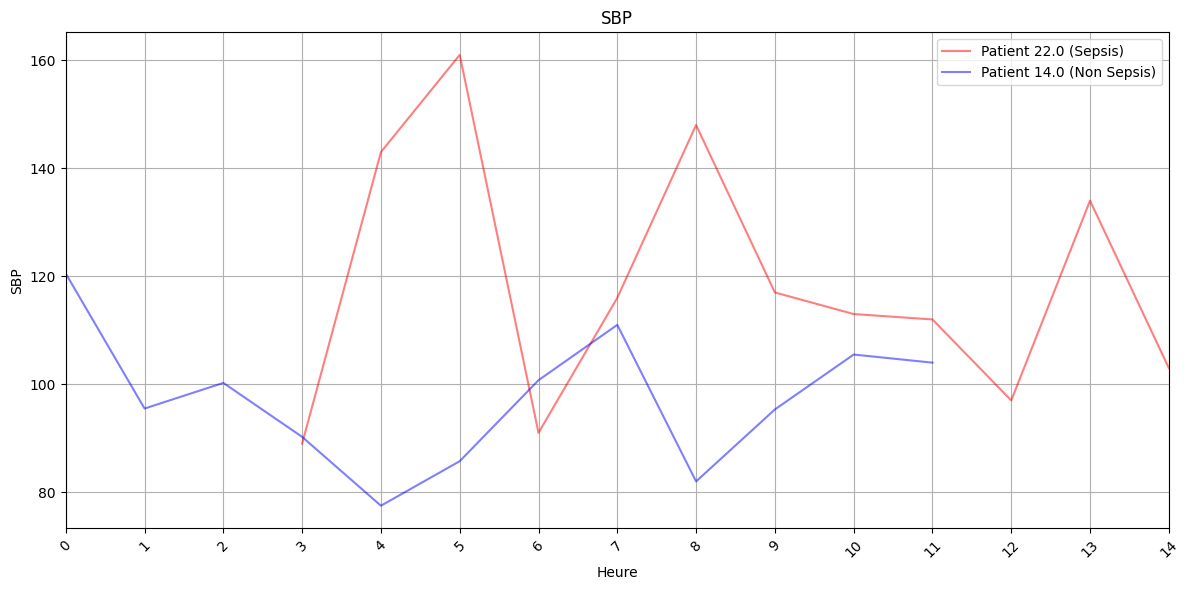

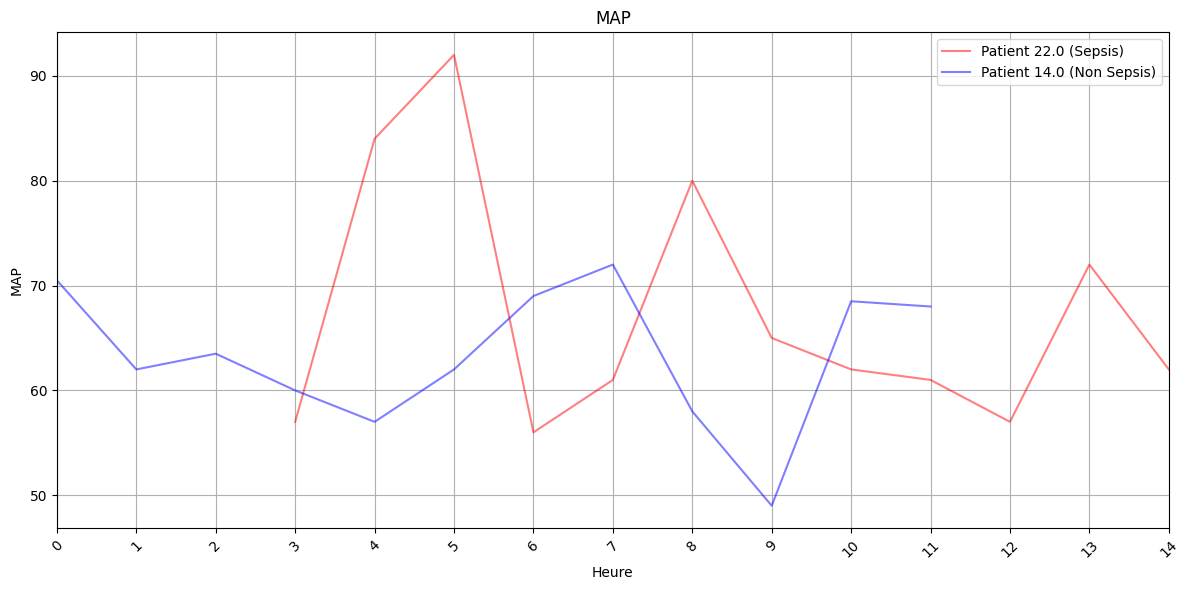

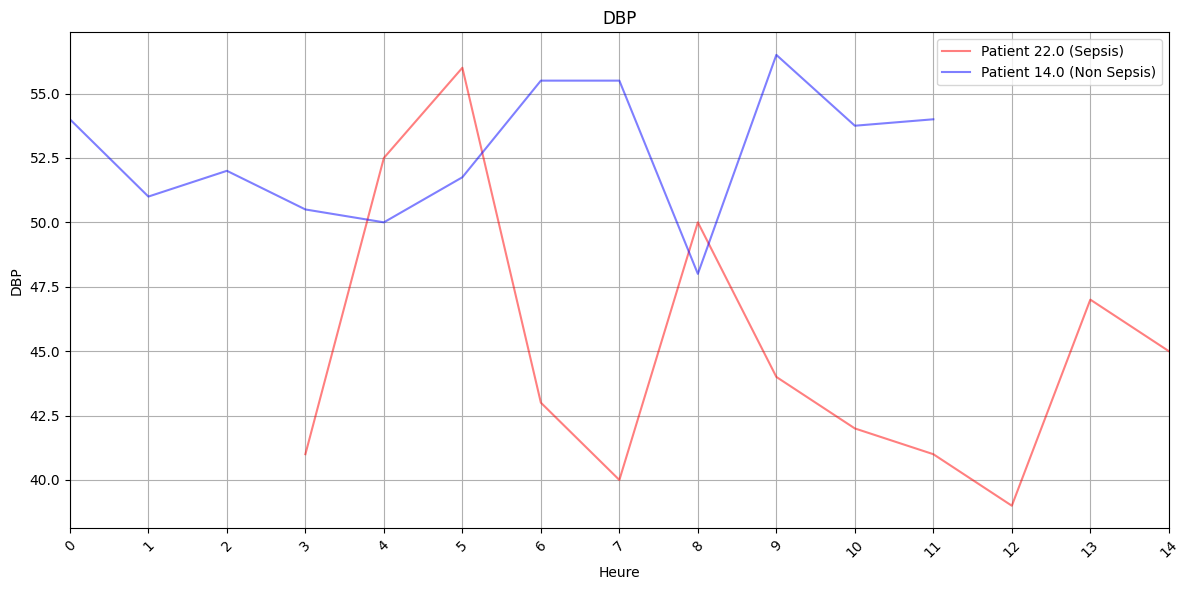

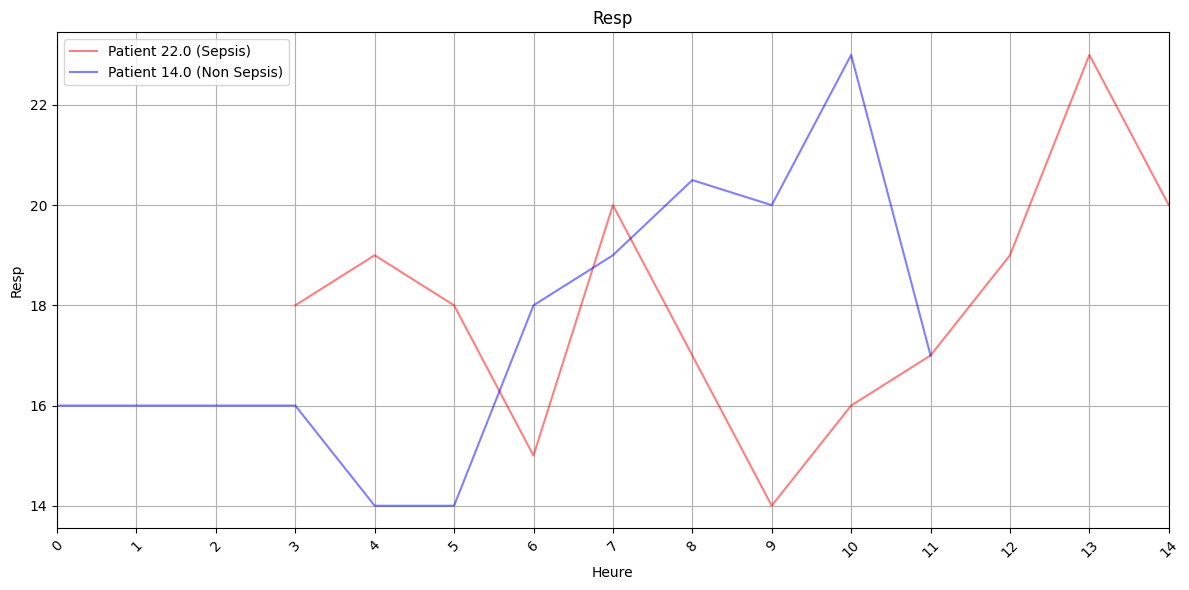

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Fonction pour tracer les signaux de deux patients (1 avec sépsis et 1 sans sépsis) ayant la même plage horaire
def plot_patients_signals_same_time(df, variables=['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp']):
    # Séparer les patients en fonction de leur statut de sépsis
    sepsis_patients = df[df['will_have_sepsis'] == 1]['Patient_ID'].unique()
    non_sepsis_patients = df[df['will_have_sepsis'] == 0]['Patient_ID'].unique()

    # Vérifier que nous avons au moins un patient dans chaque classe
    if len(sepsis_patients) == 0 or len(non_sepsis_patients) == 0:
        raise ValueError("Il doit y avoir au moins un patient avec et un sans sépsis.")

    # Chercher un patient avec sépsis et un sans sépsis ayant la même plage horaire
    for sepsis_patient in sepsis_patients:
        sepsis_hours = df[df['Patient_ID'] == sepsis_patient]['Hour'].unique()

        for non_sepsis_patient in non_sepsis_patients:
            non_sepsis_hours = df[df['Patient_ID'] == non_sepsis_patient]['Hour'].unique()

            # Vérifier si les heures se chevauchent
            common_hours = set(sepsis_hours) & set(non_sepsis_hours)
            if common_hours:
                # Si une plage horaire commune est trouvée, tracer les signaux
                selected_sepsis_patient = sepsis_patient
                selected_non_sepsis_patient = non_sepsis_patient
                break
        else:
            continue
        break
    else:
        raise ValueError("Aucun patient avec et sans sépsis n'a la même plage horaire.")

    # Pour chaque variable sélectionnée, créer une figure séparée.
    for var in variables:
        plt.figure(figsize=(12, 6))
        plt.title(var)
        plt.xlabel('Heure')
        plt.ylabel(var)

        # Tracer les données pour le patient avec sépsis
        sepsis_data = df[df['Patient_ID'] == selected_sepsis_patient]
        if var in sepsis_data.columns:
            plt.plot(sepsis_data['Hour'], sepsis_data[var], color='red', label=f'Patient {selected_sepsis_patient} (Sepsis)', alpha=0.5)

        # Tracer les données pour le patient sans sépsis
        non_sepsis_data = df[df['Patient_ID'] == selected_non_sepsis_patient]
        if var in non_sepsis_data.columns:
            plt.plot(non_sepsis_data['Hour'], non_sepsis_data[var], color='blue', label=f'Patient {selected_non_sepsis_patient} (Non Sepsis)', alpha=0.5)

        # Ajuster les limites de l'axe x en fonction des max trouvés
        max_hour = max(sepsis_data['Hour'].max(), non_sepsis_data['Hour'].max())
        plt.xlim(0, max_hour)  # Ajuster les limites de l'axe x
        plt.xticks(np.arange(0, max_hour + 1, 1))  # Ajuster les ticks de l'axe x
        plt.grid(True)
        plt.xticks(rotation=45)  # Faire pivoter les étiquettes de l'axe des x si nécessaire
        plt.legend()
        plt.tight_layout()  # Pour ajuster la mise en page
        plt.show()

# Exemple d'utilisation
plot_patients_signals_same_time(df_knn_imputed)
